# Zestaw zadań: Analiza błędow
## Zadanie 1
### Autor: Artur Gęsiarz

In [57]:
import numpy as np
import matplotlib.pyplot as plt

### Implementacja pomocniczych funkcji
#### - Tanges oraz jego pochodne

In [58]:
def function_tangens(x):
    """
    Funkcja oblicza tangensa z danego argumentu
    :param x: liczba rzeczywista
    """
    return np.tan(x)

def tangens_derivative(x):
    """
    Funkcja oblicza pochodna tangensa
    :param x: liczba rzeczywista
    :return: obliczona wartosc
    """
    return 1 + function_tangens(x) ** 2

def second_tangens_derivative(x):
    """
    Funkcja oblicza druga pochodna tangensa,
    po to aby obliczyc M
    :param x: liczba rzeczwista
    :return: wartosc drugiej pochodnej tangensa
    """
    return 2 * function_tangens(x) * tangens_derivative(x)

def third_tangens_derivative(x):
    """
    Funkcja oblicza trzecia pochodna tangensa,
    po to aby obliczyc M
    :param x: liczba rzeczwista
    :return: wartosc trzeciej pochodnej tangensa
    """
    return 2 * tangens_derivative(x) * (1 + function_tangens(x) ** 2) + \
        2 * function_tangens(x) * (2 * function_tangens(x) * tangens_derivative(x))

#### Implementacja funkcji przybliżających pochodne

In [59]:
def approx_derivative(x, h):
    """
    Funkcja oblicza przyblizona wartosc pochodnej funkcji tangensa
    :param x: liczba rzeczywista
    :param h: dany skok
    :return: przyblizona wartosc
    """
    return (function_tangens(x + h) - function_tangens(x)) / h

def approx_derivative_central(x, h):
    """
    Funkcja oblicza przyblizana wartosc pochodnej funkcji tangensa uzywajac wzoru roznic centralnych
    :param x:
    :param h:
    :return:
    """
    return (function_tangens(x + h) - function_tangens(x - h)) / ( 2 * h )

#### Implementacja funkcji obliczajcych błąd

In [60]:
def numerical_error(h, epsilon):
    """
    Funkcja oblicza blad numeryczny
    :param epsilon:
    :param h:
    :return: blad numeryczny
    """
    return 2 * epsilon / h

def method_error(M, h):
    """
    Funkcja oblicza blad metody
    :param M:
    :param h:
    :return: blad metody
    """
    return M * h / 2

def computational_error(x, h, approx_function):
    """
    Funkcja oblicza blad obliczeniowy
    :param approx_function: wskaznik do funkcji, ktora przybliza pochodna funkcji tangensa
    :param x:
    :param h:
    :return: blad obliczeniowy
    """
    return np.abs(tangens_derivative(x) - approx_function(x, h))

### Wyznacznie błędów obliczeniowych dla h = 10 ^ -k, gdzie k = 0,...,16.
##### - przyblizając pochodna tangensa za pomoca funkcji f'(x) = ( f(x + h) - f(x) ) / h

In [61]:
h_values = [10 ** -k for k in range(17)]
E_mach = np.finfo(float).eps
M = np.abs(second_tangens_derivative(1))

method_errors = [method_error(M, h) for h in h_values]
numerical_errors = [numerical_error(h, E_mach) for h in h_values]
computational_errors = [computational_error(1, h, approx_derivative) for h in h_values]

min_computational_error = min(computational_errors)
h_min_formula = 2 * np.sqrt(E_mach / M)
h_min_computational = h_values[computational_errors.index(min_computational_error)]

### Funkcje do rysowanie wykresy
##### - przyblizając pochodna tangensa za pomoca funkcji f'(x) = ( f(x + h) - f(x) ) / h

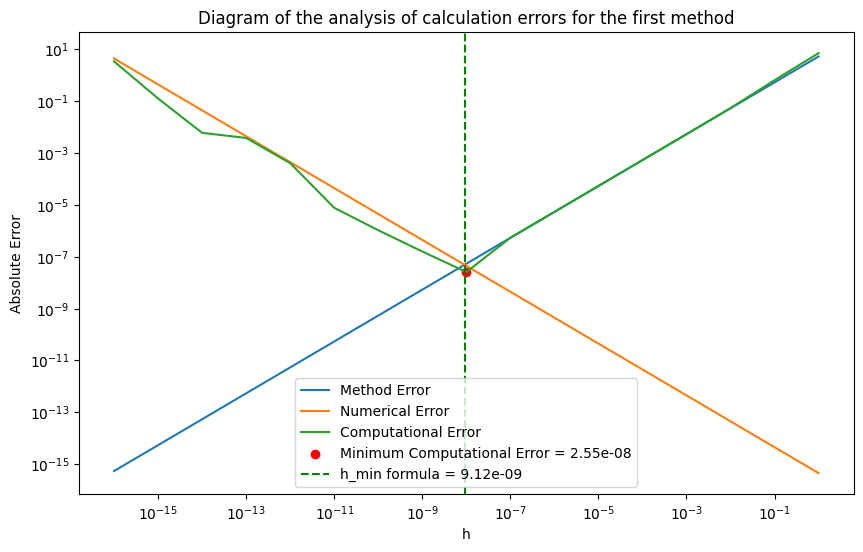

In [62]:
plt.figure(figsize=(10, 6))
plt.loglog(h_values, method_errors, label='Method Error')
plt.loglog(h_values, numerical_errors, label='Numerical Error')
plt.loglog(h_values, computational_errors, label='Computational Error')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Diagram of the analysis of calculation errors for the first method')
plt.legend()

plt.scatter(h_min_computational, min_computational_error, color='red', label=f'Minimum Computational Error = {min_computational_error:.2e}')
plt.axvline(x=h_min_formula, color='g', linestyle='--', label=f'h_min formula = {h_min_formula:.2e}')
plt.legend()

plt.show()

##### Analizujac wykres mozemy zauwazyc ze wykres wartosci bezwzgledniej bledu obliczeniowego posiada miniumum w punkcie h wynosi 1.00e-08, a natomiat globalne h_min wynosi 9.12e-09
##### wyniki te się różnią o 8.76e-10, czyli są niemal równe

### Wyznacznie błędów obliczeniowych dla h = 10 ^ -k, gdzie k = 0,...,16.
##### - przyblizając pochodna tangensa za pomoca funkcji f'(x) = ( f(x + h) - f(x - h) ) / 2h

In [63]:
h_values = [10 ** -k for k in range(17)]
E_mach = np.finfo(float).eps
M = np.abs(third_tangens_derivative(1))

method_errors = [method_error(M, h) for h in h_values]
numerical_errors = [numerical_error(h, E_mach) for h in h_values]
computational_errors = [computational_error(1, h, approx_derivative_central) for h in h_values]

min_computational_error = min(computational_errors)
h_min_formula = (3 * E_mach / M) ** (1/3)
h_min_computational = h_values[computational_errors.index(min_computational_error)]

### Funkcje do rysowanie wykresy
##### - przyblizając pochodna tangensa za pomoca funkcji f'(x) = ( f(x + h) - f(x - h) ) / 2h

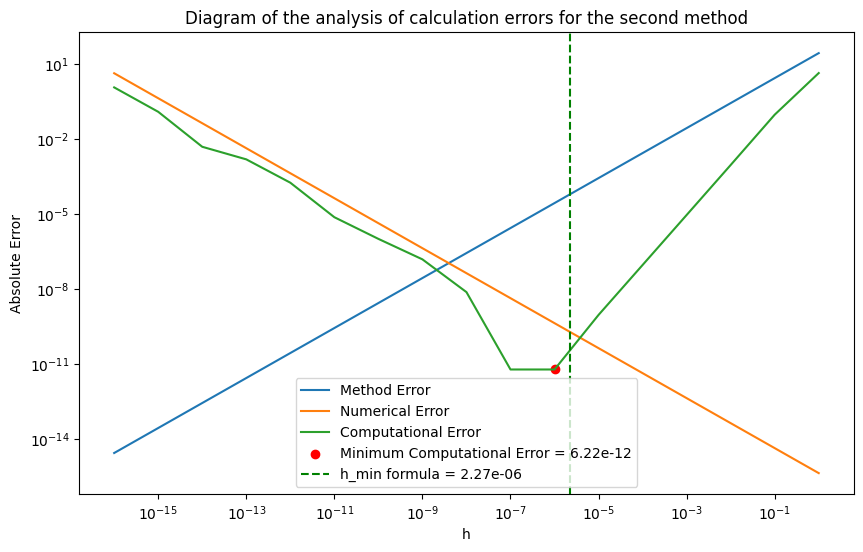

In [64]:
plt.figure(figsize=(10, 6))
plt.loglog(h_values, method_errors, label='Method Error')
plt.loglog(h_values, numerical_errors, label='Numerical Error')
plt.loglog(h_values, computational_errors, label='Computational Error')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Diagram of the analysis of calculation errors for the second method')
plt.legend()

plt.scatter(h_min_computational, min_computational_error, color='red', label=f'Minimum Computational Error = {min_computational_error:.2e}')
plt.axvline(x=h_min_formula, color='g', linestyle='--', label=f'h_min formula = {h_min_formula:.2e}')
plt.legend()

plt.show()

##### Analizując wykres błędów otrzymanych licząc przyblizenie pochodnej drugim wzorem a dokladnie, wzorem różnic centralnych otrzymalismy znacznie mniejszy blad bezwezlgedny
##### licząc wzglem pierwszego wzoru, lecz h_min globalne od h_min wykresu rózni sie znacznie a dokladnie o 1.28e-06.

# Podsumowanie

### Biorac pod uwage obie metody bardziej korzystane jest korzystanie z drugiego wzoru, poniewaz otrzymalismy znacznie mniejszy błąd bezwzgledny, lecz kosztem bardziej odleglej wartosci mimalnej niz wartosc z pierwszego sposobu